In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing

In [3]:
 
dr_p = pd.read_csv("data/doctor_workplace.csv")
hos = pd.read_csv("data/hospital.csv", engine = "python")
mr = pd.read_csv("data/mr.csv")
mrkun = pd.read_csv("data/mrkun.csv")
sales = pd.read_csv("data/sales.csv")
speciality = pd.read_csv("data/specialty.csv")
hos_code = hos_code = pd.read_csv("data/hos_code.csv", encoding="shift_jis")
data = [mrkun,  speciality,  hos_code,  sales,  hos,  mr, dr_p]


In [4]:
for i in range(len(data)):
    display(data[i].head())


,doctor_id,send_count,read_count
0,1.0,52,0
1,3.0,43,0
2,5.0,51,0
3,6.0,52,0
4,10.0,49,0


,doctor_id,specialty
0,0.0,A
1,1.0,C
2,2.0,B
3,3.0,M
4,4.0,A


,コード,診療科
0,A01,一般内科
1,A02,腫瘍科
2,A03,腫瘍内科
3,A04,腫瘍内科（疼痛緩和）
4,A05,血液・腫瘍内科


,hospital_id,201911,201912,202001,202002,202003,202004,202005,202006,202007,...,202107,202108,202109,202110,202111,202112,202201,202202,202203,202204
0,65003,13195,13496,14204,20484,26642,16392,13975,12810,11752,...,12543,12609,12971,15757,14786,15247,16075,27840,37593,20573
1,10192,3474,3623,3972,7068,10104,5050,3859,3284,2763,...,3153,3185,3364,4737,4291,4518,4927,10738,15555,7149
2,15490,2218,2279,2422,3691,4935,2864,2376,2140,1927,...,2086,2100,2173,2736,2569,2663,2832,5233,7223,3750
3,93607,1886,1959,2132,3662,5162,2665,2076,1792,1534,...,1727,1743,1831,2510,2267,2378,2579,5424,7782,3666
4,12727,1415,1466,1585,2638,3672,1952,1546,1350,1173,...,1306,1317,1378,1845,1695,1773,1913,3894,5538,2670


,hospital_id,hospital_region_name
0,65003,中国地方
1,10192,中国地方
2,15490,中国地方
3,93607,中国地方
4,12727,中国地方


,hospital_id,has_visit
0,65003,0.0
1,10192,0.0
2,15490,0.0
3,93607,0.0
4,12727,0.0


,hospital_id,doctor_id
0,65003.0,0.0
1,65003.0,1.0
2,15490.0,2.0
3,15490.0,3.0
4,15490.0,4.0


In [48]:
sales_c = sales.columns.values
print(sales_c)
print(len(sales_c))
print(len(sales.loc[:, sales_c[1:7]].columns.values))
sales.loc[:, sales_c[1:7]]
sales["~202004_ave"]= (sales.loc[:, sales_c[1:7]].sum(axis = 1)/6).astype("int64")
sales["~202010_ave"]= (sales.loc[:, sales_c[7:13]].sum(axis = 1)/6).astype("int64")
sales["~202104_ave"]= (sales.loc[:, sales_c[13:19]].sum(axis = 1)/6).astype("int64")
sales["~202110_ave"]= (sales.loc[:, sales_c[19:25]].sum(axis = 1)/6).astype("int64")
sales["~202204_ave"]= (sales.loc[:, sales_c[25:31]].sum(axis = 1)/6).astype("int64")

['hospital_id' '201911' '201912' '202001' '202002' '202003' '202004'
 '202005' '202006' '202007' '202008' '202009' '202010' '202011' '202012'
 '202101' '202102' '202103' '202104' '202105' '202106' '202107' '202108'
 '202109' '202110' '202111' '202112' '202201' '202202' '202203' '202204'
 '~202004_ave' '~202010_ave' '~202104_ave' '~202110_ave' '~202204_ave'
 'dr_count' 'send_count' 'read_count' 'specialty' 'has_visit']
41
6


In [6]:
x = dr_p["hospital_id"].value_counts(sort = False)
y = dr_p["hospital_id"].unique()
x = pd.DataFrame(x)
y = (pd.DataFrame(y)).rename(columns = {0:"hospital_id"})
y["dr_count"] = x["hospital_id"].values


# yとsalesをhospital_idをキーとして左結合
sales = sales.merge(y, how="left")
sales

,hospital_id,201911,201912,202001,202002,202003,202004,202005,202006,202007,...,202201,202202,202203,202204,~202004_ave,~202010_ave,~202104_ave,~202110_ave,~202204_ave,dr_count
0,65003,13195,13496,14204,20484,26642,16392,13975,12810,11752,...,16075,27840,37593,20573,17402,12980,20434,13475,22019,2.0
1,10192,3474,3623,3972,7068,10104,5050,3859,3284,2763,...,4927,10738,15555,7149,5548,3368,7043,3612,7863,NaN
2,15490,2218,2279,2422,3691,4935,2864,2376,2140,1927,...,2832,5233,7223,3750,3068,2174,3681,2274,4045,3.0
3,93607,1886,1959,2132,3662,5162,2665,2076,1792,1534,...,2579,5424,7782,3666,2911,1833,3649,1953,4016,2.0
4,12727,1415,1466,1585,2638,3672,1952,1546,1350,1173,...,1913,3894,5538,2670,2121,1379,2630,1462,2913,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50367,82466,126899,130846,140135,222524,303310,168836,137121,121836,107962,...,174334,337364,472514,236676,182091,124071,221875,130564,256704,1.0
50368,72770,165,172,187,323,455,234,182,157,134,...,253,534,767,361,256,160,321,171,395,1.0
50369,90989,270,281,306,527,744,383,298,257,219,...,440,930,1335,627,418,262,525,280,687,1.0
50370,81225,7113,7390,8043,13837,19518,10062,7831,6756,5781,...,10454,22019,31607,14876,10993,6913,13791,7370,16297,1.0


In [49]:
speciality = speciality.merge(dr_p, how="left")
speciality = speciality.merge(mrkun, how="left")
speciality.fillna(0, inplace = True)
speciality["send_count"] = speciality["send_count"].astype("int64")
speciality["read_count"] = speciality["read_count"].astype("int64")
hos_mrkun = speciality.groupby("hospital_id",as_index= False,sort= False).sum()
hos_spe  = speciality.groupby('hospital_id')['specialty'].agg(lambda x: x.mode()[0]).reset_index()
hos_mrkun = hos_mrkun.merge(hos_spe, how="left")
hos_mrkun.drop("doctor_id", axis = 1, inplace = True)
sales = sales.merge(hos_mrkun, how="left")
spe = sales["specialty"].unique()  
#sales["specialty_id"] = 0
#for i in range(len(spe)):
#    sales["specialty_id"][sales["specialty"] == spe[i]] = i+1
#sales.drop("specialty", axis = 1, inplace = True)

/var/folders/42/922wnzy13c1bxs6j8mf7gwq00000gn/T/ipykernel_97595/2000975006.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  hos_mrkun = speciality.groupby("hospital_id",as_index= False,sort= False).sum()


In [8]:
sales = sales.merge(mr, how="left")
sales

,hospital_id,201911,201912,202001,202002,202003,202004,202005,202006,202007,...,~202004_ave,~202010_ave,~202104_ave,~202110_ave,~202204_ave,dr_count,send_count,read_count,specialty,has_visit
0,65003,13195,13496,14204,20484,26642,16392,13975,12810,11752,...,17402,12980,20434,13475,22019,2.0,52.0,0.0,A,0.0
1,10192,3474,3623,3972,7068,10104,5050,3859,3284,2763,...,5548,3368,7043,3612,7863,NaN,NaN,NaN,NaN,0.0
2,15490,2218,2279,2422,3691,4935,2864,2376,2140,1927,...,3068,2174,3681,2274,4045,3.0,43.0,0.0,A,0.0
3,93607,1886,1959,2132,3662,5162,2665,2076,1792,1534,...,2911,1833,3649,1953,4016,2.0,103.0,0.0,A,0.0
4,12727,1415,1466,1585,2638,3672,1952,1546,1350,1173,...,2121,1379,2630,1462,2913,3.0,0.0,0.0,A,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50367,82466,126899,130846,140135,222524,303310,168836,137121,121836,107962,...,182091,124071,221875,130564,256704,1.0,45.0,45.0,O,1.0
50368,72770,165,172,187,323,455,234,182,157,134,...,256,160,321,171,395,1.0,52.0,52.0,A,1.0
50369,90989,270,281,306,527,744,383,298,257,219,...,418,262,525,280,687,1.0,55.0,55.0,N,1.0
50370,81225,7113,7390,8043,13837,19518,10062,7831,6756,5781,...,10993,6913,13791,7370,16297,1.0,47.0,47.0,C,1.0


In [9]:
sales_mrkun = sales.copy()
sales_mrkun.drop(['201911', '201912', '202001', '202002', '202003',
       '202004', '202005', '202006', '202007', '202008', '202009',
       '202010', '202011', '202012', '202101', '202102', '202103',
       '202104', '202105', '202106', '202107', '202108', '202109',
       '202110', '202111', '202112', '202201', '202202', '202203',
       '202204'], axis = 1, inplace = True)
sales_mrkun

,hospital_id,~202004_ave,~202010_ave,~202104_ave,~202110_ave,~202204_ave,dr_count,send_count,read_count,specialty,has_visit
0,65003,17402,12980,20434,13475,22019,2.0,52.0,0.0,A,0.0
1,10192,5548,3368,7043,3612,7863,NaN,NaN,NaN,NaN,0.0
2,15490,3068,2174,3681,2274,4045,3.0,43.0,0.0,A,0.0
3,93607,2911,1833,3649,1953,4016,2.0,103.0,0.0,A,0.0
4,12727,2121,1379,2630,1462,2913,3.0,0.0,0.0,A,0.0
...,...,...,...,...,...,...,...,...,...,...,...
50367,82466,182091,124071,221875,130564,256704,1.0,45.0,45.0,O,1.0
50368,72770,256,160,321,171,395,1.0,52.0,52.0,A,1.0
50369,90989,418,262,525,280,687,1.0,55.0,55.0,N,1.0
50370,81225,10993,6913,13791,7370,16297,1.0,47.0,47.0,C,1.0


In [10]:
region = hos["hospital_region_name"].unique()
hos["region_id"] = [0 for i in range(len(hos))]
hos["region_id"][hos["hospital_region_name"] == region[3]] = 0
hos["region_id"][hos["hospital_region_name"] == region[5]] = 1
hos["region_id"][hos["hospital_region_name"] == region[7]] = 2
hos["region_id"][hos["hospital_region_name"] == region[1]] = 3
hos["region_id"][hos["hospital_region_name"] == region[6]] = 4
hos["region_id"][hos["hospital_region_name"] == region[0]] = 5
hos["region_id"][hos["hospital_region_name"] == region[4]] = 6
hos["region_id"][hos["hospital_region_name"] == region[2]] = 7
region = ["北海道", "東北", "関東", "中部", "近畿", "中国", "四国", "九州"]
dr_p["hospital_id"]= dr_p["hospital_id"].astype("int64")


/var/folders/42/922wnzy13c1bxs6j8mf7gwq00000gn/T/ipykernel_97595/3743389517.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hos["region_id"][hos["hospital_region_name"] == region[3]] = 0
/var/folders/42/922wnzy13c1bxs6j8mf7gwq00000gn/T/ipykernel_97595/3743389517.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hos["region_id"][hos["hospital_region_name"] == region[5]] = 1
/var/folders/42/922wnzy13c1bxs6j8mf7gwq00000gn/T/ipykernel_97595/3743389517.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

In [11]:
sales_mrkun = sales_mrkun.merge(hos.drop("hospital_region_name",axis=1), how="left")
sales_mrkun ["has_mrkun"] = 0
sales_mrkun.fillna(0, inplace = True)
sales_mrkun["has_mrkun"][sales_mrkun["read_count"] != 0] = 1  
sales_mrkun

/var/folders/42/922wnzy13c1bxs6j8mf7gwq00000gn/T/ipykernel_97595/817727993.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_mrkun["has_mrkun"][sales_mrkun["read_count"] != 0] = 1


,hospital_id,~202004_ave,~202010_ave,~202104_ave,~202110_ave,~202204_ave,dr_count,send_count,read_count,specialty,has_visit,region_id,has_mrkun
0,65003,17402,12980,20434,13475,22019,2.0,52.0,0.0,A,0.0,5,0
1,10192,5548,3368,7043,3612,7863,0.0,0.0,0.0,0,0.0,5,0
2,15490,3068,2174,3681,2274,4045,3.0,43.0,0.0,A,0.0,5,0
3,93607,2911,1833,3649,1953,4016,2.0,103.0,0.0,A,0.0,5,0
4,12727,2121,1379,2630,1462,2913,3.0,0.0,0.0,A,0.0,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50367,82466,182091,124071,221875,130564,256704,1.0,45.0,45.0,O,1.0,2,1
50368,72770,256,160,321,171,395,1.0,52.0,52.0,A,1.0,2,1
50369,90989,418,262,525,280,687,1.0,55.0,55.0,N,1.0,2,1
50370,81225,10993,6913,13791,7370,16297,1.0,47.0,47.0,C,1.0,2,1


In [51]:
sales_mrkun.describe()

,hospital_id,~202004_ave,~202010_ave,~202104_ave,~202110_ave,~202204_ave,dr_count,send_count,read_count,has_visit,region_id,has_mrkun
count,50372.000000,5.037200e+04,5.037200e+04,5.037200e+04,5.037200e+04,5.037200e+04,50372.000000,50372.000000,50372.000000,50372.000000,50372.000000,50372.000000
mean,53340.601525,6.963048e+04,4.491404e+04,8.659760e+04,4.767636e+04,9.943224e+04,7.101882,85.931251,35.100413,0.212836,3.348904,0.347475
std,27420.555444,3.144346e+05,1.985496e+05,3.941538e+05,2.114760e+05,4.616719e+05,45.096622,457.376576,180.753527,0.409317,1.912278,0.476173
min,5743.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,29566.500000,4.261500e+03,2.899000e+03,5.195750e+03,3.055000e+03,5.822000e+03,1.000000,0.000000,0.000000,0.000000,2.000000,0.000000
50%,53456.500000,1.176800e+04,7.759500e+03,1.448950e+04,8.219000e+03,1.622400e+04,1.000000,45.000000,0.000000,0.000000,3.000000,0.000000
75%,76992.250000,3.359875e+04,2.189900e+04,4.167500e+04,2.319300e+04,4.706725e+04,2.000000,51.000000,36.000000,0.000000,4.000000,1.000000
max,100795.000000,9.030543e+06,5.414814e+06,1.150982e+07,5.819464e+06,1.378914e+07,2018.000000,20924.000000,8081.000000,1.000000,7.000000,1.000000


標準化

In [12]:
ss = preprocessing.StandardScaler()

ドクターで標準化

In [13]:
sales_mrkun_norm = sales_mrkun.copy()
sales_mrkun_norm["~202004_dr"] = 0
sales_mrkun_norm["~202004_dr"][sales_mrkun_norm["dr_count"]!= 0] = (sales_mrkun_norm["~202004_ave"]/sales_mrkun_norm["dr_count"])
sales_mrkun_norm["~202004_norm"] =ss.fit_transform(sales_mrkun_norm["~202004_dr"].values.reshape(-1,1))
sales_mrkun_norm["~202010_dr"] = 0
sales_mrkun_norm["~202010_dr"][sales_mrkun_norm["dr_count"]!= 0] = (sales_mrkun_norm["~202010_ave"]/sales_mrkun_norm["dr_count"])
sales_mrkun_norm["~202010_norm"] =ss.fit_transform(sales_mrkun_norm["~202010_dr"].values.reshape(-1,1))
sales_mrkun_norm["~202104_dr"] = 0
sales_mrkun_norm["~202104_dr"][sales_mrkun_norm["dr_count"]!= 0] = (sales_mrkun_norm["~202104_ave"]/sales_mrkun_norm["dr_count"])
sales_mrkun_norm["~202104_norm"] =ss.fit_transform(sales_mrkun_norm["~202104_dr"].values.reshape(-1,1))
sales_mrkun_norm["~202110_dr"] = 0
sales_mrkun_norm["~202110_dr"][sales_mrkun_norm["dr_count"]!= 0] = (sales_mrkun_norm["~202110_ave"]/sales_mrkun_norm["dr_count"])
sales_mrkun_norm["~202110_norm"] =ss.fit_transform(sales_mrkun_norm["~202110_dr"].values.reshape(-1,1))
sales_mrkun_norm["~202204_dr"] = 0
sales_mrkun_norm["~202204_dr"][sales_mrkun_norm["dr_count"]!= 0] = (sales_mrkun_norm["~202204_ave"]/sales_mrkun_norm["dr_count"])
sales_mrkun_norm["~202204_norm"] =ss.fit_transform(sales_mrkun_norm["~202204_dr"].values.reshape(-1,1))

sales_mrkun_norm

/var/folders/42/922wnzy13c1bxs6j8mf7gwq00000gn/T/ipykernel_97595/1377752253.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_mrkun_norm["~202004_dr"][sales_mrkun_norm["dr_count"]!= 0] = (sales_mrkun_norm["~202004_ave"]/sales_mrkun_norm["dr_count"])
/var/folders/42/922wnzy13c1bxs6j8mf7gwq00000gn/T/ipykernel_97595/1377752253.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_mrkun_norm["~202010_dr"][sales_mrkun_norm["dr_count"]!= 0] = (sales_mrkun_norm["~202010_ave"]/sales_mrkun_norm["dr_count"])
/var/folders/42/922wnzy13c1bxs6j8mf7gwq00000gn/T/ipykernel_97595/1377752253.py:9: SettingWithCopyWarning: 
A v

,hospital_id,~202004_ave,~202010_ave,~202104_ave,~202110_ave,~202204_ave,dr_count,send_count,read_count,specialty,...,~202004_dr,~202004_norm,~202010_dr,~202010_norm,~202104_dr,~202104_norm,~202110_dr,~202110_norm,~202204_dr,~202204_norm
0,65003,17402,12980,20434,13475,22019,2.0,52.0,0.0,A,...,8701.000000,-0.163727,6490.000000,-0.160000,10217.000000,-0.164962,6737.500000,-0.160632,11009.500000,-0.164097
1,10192,5548,3368,7043,3612,7863,0.0,0.0,0.0,0,...,0.000000,-0.205629,0.000000,-0.209265,0.000000,-0.204277,0.000000,-0.208687,0.000000,-0.200622
2,15490,3068,2174,3681,2274,4045,3.0,43.0,0.0,A,...,1022.666667,-0.200704,724.666667,-0.203765,1227.000000,-0.199556,758.000000,-0.203280,1348.333333,-0.196149
3,93607,2911,1833,3649,1953,4016,2.0,103.0,0.0,A,...,1455.500000,-0.198619,916.500000,-0.202308,1824.500000,-0.197257,976.500000,-0.201722,2008.000000,-0.193961
4,12727,2121,1379,2630,1462,2913,3.0,0.0,0.0,A,...,707.000000,-0.202224,459.666667,-0.205776,876.666667,-0.200904,487.333333,-0.205211,971.000000,-0.197401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50367,82466,182091,124071,221875,130564,256704,1.0,45.0,45.0,O,...,182091.000000,0.671277,124071.000000,0.732554,221875.000000,0.649496,130564.000000,0.722556,256704.000000,0.651030
50368,72770,256,160,321,171,395,1.0,52.0,52.0,A,...,256.000000,-0.204396,160.000000,-0.208051,321.000000,-0.203042,171.000000,-0.207467,395.000000,-0.199312
50369,90989,418,262,525,280,687,1.0,55.0,55.0,N,...,418.000000,-0.203616,262.000000,-0.207277,525.000000,-0.202257,280.000000,-0.206690,687.000000,-0.198343
50370,81225,10993,6913,13791,7370,16297,1.0,47.0,47.0,C,...,10993.000000,-0.152689,6913.000000,-0.156789,13791.000000,-0.151210,7370.000000,-0.156120,16297.000000,-0.146555


In [14]:
sales_mrkun_norm["send_count_dr"] = 0
sales_mrkun_norm["send_count_dr"][sales_mrkun_norm["send_count"] != 0] = sales_mrkun_norm["send_count"]/sales_mrkun_norm["dr_count"]
sales_mrkun_norm["send_count_norm"] = ss.fit_transform(sales_mrkun_norm["send_count_dr"].values.reshape(-1,1))
sales_mrkun_norm["read_count_dr"] = 0
sales_mrkun_norm["read_count_dr"][sales_mrkun_norm["read_count"] != 0] = sales_mrkun_norm["read_count"]/sales_mrkun_norm["dr_count"]
sales_mrkun_norm["read_count_norm"] = ss.fit_transform(sales_mrkun_norm["read_count_dr"].values.reshape(-1,1))

/var/folders/42/922wnzy13c1bxs6j8mf7gwq00000gn/T/ipykernel_97595/2999811246.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_mrkun_norm["send_count_dr"][sales_mrkun_norm["send_count"] != 0] = sales_mrkun_norm["send_count"]/sales_mrkun_norm["dr_count"]
/var/folders/42/922wnzy13c1bxs6j8mf7gwq00000gn/T/ipykernel_97595/2999811246.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_mrkun_norm["read_count_dr"][sales_mrkun_norm["read_count"] != 0] = sales_mrkun_norm["read_count"]/sales_mrkun_norm["dr_count"]


In [15]:
sales_mrkun_norm.describe()

,hospital_id,~202004_ave,~202010_ave,~202104_ave,~202110_ave,~202204_ave,dr_count,send_count,read_count,has_visit,...,~202104_dr,~202104_norm,~202110_dr,~202110_norm,~202204_dr,~202204_norm,send_count_dr,send_count_norm,read_count_dr,read_count_norm
count,50372.000000,5.037200e+04,5.037200e+04,5.037200e+04,5.037200e+04,5.037200e+04,50372.000000,50372.000000,50372.000000,50372.000000,...,5.037200e+04,5.037200e+04,5.037200e+04,5.037200e+04,5.037200e+04,5.037200e+04,50372.000000,5.037200e+04,50372.000000,5.037200e+04
mean,53340.601525,6.963048e+04,4.491404e+04,8.659760e+04,4.767636e+04,9.943224e+04,7.101882,85.931251,35.100413,0.212836,...,5.308670e+04,-9.027780e-18,2.925871e+04,9.027780e-18,6.047137e+04,1.805556e-17,17.971336,-1.354167e-16,7.065322,-1.083334e-16
std,27420.555444,3.144346e+05,1.985496e+05,3.941538e+05,2.114760e+05,4.616719e+05,45.096622,457.376576,180.753527,0.409317,...,2.598782e+05,1.000010e+00,1.402054e+05,1.000010e+00,3.014217e+05,1.000010e+00,21.080893,1.000010e+00,14.508722,1.000010e+00
min,5743.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,-2.042773e-01,0.000000e+00,-2.086867e-01,0.000000e+00,-2.006225e-01,0.000000,-8.525025e-01,0.000000,-4.869755e-01
25%,29566.500000,4.261500e+03,2.899000e+03,5.195750e+03,3.055000e+03,5.822000e+03,1.000000,0.000000,0.000000,0.000000,...,1.953000e+03,-1.967622e-01,1.184729e+03,-2.002367e-01,2.198000e+03,-1.933303e-01,0.000000,-8.525025e-01,0.000000,-4.869755e-01
50%,53456.500000,1.176800e+04,7.759500e+03,1.448950e+04,8.219000e+03,1.622400e+04,1.000000,45.000000,0.000000,0.000000,...,7.909000e+03,-1.738435e-01,4.529000e+03,-1.763838e-01,8.872333e+03,-1.711872e-01,8.166667,-4.651021e-01,0.000000,-4.869755e-01
75%,76992.250000,3.359875e+04,2.189900e+04,4.167500e+04,2.319300e+04,4.706725e+04,2.000000,51.000000,36.000000,0.000000,...,2.555125e+04,-1.059563e-01,1.430400e+04,-1.066639e-01,2.870675e+04,-1.053837e-01,46.000000,1.329590e+00,5.175711,-1.302410e-01
max,100795.000000,9.030543e+06,5.414814e+06,1.150982e+07,5.819464e+06,1.378914e+07,2018.000000,20924.000000,8081.000000,1.000000,...,8.192349e+06,3.131983e+01,4.351839e+06,3.083065e+01,9.650475e+06,3.181621e+01,60.000000,1.993705e+00,60.000000,3.648509e+00


In [16]:
sales_norm = sales_mrkun_norm.copy()
sales_norm.drop(["~202004_dr", "~202010_dr", "~202104_dr", "~202110_dr", "~202204_dr"], axis = 1, inplace = True)
sales_norm.drop(["~202004_ave", "~202010_ave", "~202104_ave", "~202110_ave", "~202204_ave"], axis = 1, inplace = True)
sales_norm.drop(["send_count_dr", "read_count_dr"], axis = 1, inplace = True) 
sales_norm.drop(["send_count", "read_count"], axis = 1, inplace = True)  
sales_norm

,hospital_id,dr_count,specialty,has_visit,region_id,has_mrkun,~202004_norm,~202010_norm,~202104_norm,~202110_norm,~202204_norm,send_count_norm,read_count_norm
0,65003,2.0,A,0.0,5,0,-0.163727,-0.160000,-0.164962,-0.160632,-0.164097,0.380854,-0.486976
1,10192,0.0,0,0.0,5,0,-0.205629,-0.209265,-0.204277,-0.208687,-0.200622,-0.852503,-0.486976
2,15490,3.0,A,0.0,5,0,-0.200704,-0.203765,-0.199556,-0.203280,-0.196149,-0.172575,-0.486976
3,93607,2.0,A,0.0,5,0,-0.198619,-0.202308,-0.197257,-0.201722,-0.193961,1.590492,-0.486976
4,12727,3.0,A,0.0,5,0,-0.202224,-0.205776,-0.200904,-0.205211,-0.197401,-0.852503,-0.486976
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50367,82466,1.0,O,1.0,2,1,0.671277,0.732554,0.649496,0.722556,0.651030,1.282153,2.614638
50368,72770,1.0,A,1.0,2,1,-0.204396,-0.208051,-0.203042,-0.207467,-0.199312,1.614211,3.097111
50369,90989,1.0,N,1.0,2,1,-0.203616,-0.207277,-0.202257,-0.206690,-0.198343,1.756521,3.303885
50370,81225,1.0,C,1.0,2,1,-0.152689,-0.156789,-0.151210,-0.156120,-0.146555,1.377027,2.752487


既読数で標準化

In [17]:
sales_read = sales_mrkun.copy()
sales_read.fillna(0, inplace = True)
sales_read["~202004_r"] = sales_read["~202004_ave"]/sales_read["read_count"]
sales_read["~202010_r"] = sales_read["~202010_ave"]/sales_read["read_count"]
sales_read["~202104_r"] = sales_read["~202104_ave"]/sales_read["read_count"]
sales_read["~202110_r"] = sales_read["~202110_ave"]/sales_read["read_count"]
sales_read["~202204_r"] = sales_read["~202204_ave"]/sales_read["read_count"]
sales_read.drop(["~202004_ave", "~202010_ave", "~202104_ave", "~202110_ave", "~202204_ave"], axis = 1, inplace = True)
for i in range(8):
    display(sales_read[sales_read["read_count"] != 0][sales_read["region_id"]==i][sales_read["has_visit"]==0].corr().style.background_gradient(axis=None))

/var/folders/42/922wnzy13c1bxs6j8mf7gwq00000gn/T/ipykernel_97595/2511497775.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  display(sales_read[sales_read["read_count"] != 0][sales_read["region_id"]==i][sales_read["has_visit"]==0].corr().style.background_gradient(axis=None))
/var/folders/42/922wnzy13c1bxs6j8mf7gwq00000gn/T/ipykernel_97595/2511497775.py:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  display(sales_read[sales_read["read_count"] != 0][sales_read["region_id"]==i][sales_read["has_visit"]==0].corr().style.background_gradient(axis=None))


,hospital_id,dr_count,send_count,read_count,has_visit,region_id,has_mrkun,~202004_r,~202010_r,~202104_r,~202110_r,~202204_r
hospital_id,1.000000,-0.017448,-0.009397,-0.014058,nan,nan,nan,0.002510,0.002572,0.002537,0.002533,0.004707
dr_count,-0.017448,1.000000,0.984056,0.943557,nan,nan,nan,-0.035380,-0.035273,-0.035430,-0.035283,-0.035795
send_count,-0.009397,0.984056,1.000000,0.963079,nan,nan,nan,-0.049618,-0.049660,-0.049613,-0.049646,-0.049680
read_count,-0.014058,0.943557,0.963079,1.000000,nan,nan,nan,-0.088238,-0.088357,-0.088211,-0.088326,-0.088168
has_visit,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
region_id,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
has_mrkun,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
~202004_r,0.002510,-0.035380,-0.049618,-0.088238,nan,nan,nan,1.000000,0.999775,0.999972,0.999845,0.999351
~202010_r,0.002572,-0.035273,-0.049660,-0.088357,nan,nan,nan,0.999775,1.000000,0.999591,0.999993,0.998610
~202104_r,0.002537,-0.035430,-0.049613,-0.088211,nan,nan,nan,0.999972,0.999591,1.000000,0.999687,0.999509


/var/folders/42/922wnzy13c1bxs6j8mf7gwq00000gn/T/ipykernel_97595/2511497775.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  display(sales_read[sales_read["read_count"] != 0][sales_read["region_id"]==i][sales_read["has_visit"]==0].corr().style.background_gradient(axis=None))
/var/folders/42/922wnzy13c1bxs6j8mf7gwq00000gn/T/ipykernel_97595/2511497775.py:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  display(sales_read[sales_read["read_count"] != 0][sales_read["region_id"]==i][sales_read["has_visit"]==0].corr().style.background_gradient(axis=None))


,hospital_id,dr_count,send_count,read_count,has_visit,region_id,has_mrkun,~202004_r,~202010_r,~202104_r,~202110_r,~202204_r
hospital_id,1.000000,0.036527,0.028806,0.025849,nan,nan,nan,0.019152,0.021247,0.018530,0.020879,0.017682
dr_count,0.036527,1.000000,0.990917,0.967976,nan,nan,nan,-0.057604,-0.058833,-0.057124,-0.058646,-0.057089
send_count,0.028806,0.990917,1.000000,0.976981,nan,nan,nan,-0.060058,-0.061504,-0.059501,-0.061282,-0.059429
read_count,0.025849,0.967976,0.976981,1.000000,nan,nan,nan,-0.107181,-0.109536,-0.106282,-0.109174,-0.106086
has_visit,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
region_id,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
has_mrkun,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
~202004_r,0.019152,-0.057604,-0.060058,-0.107181,nan,nan,nan,1.000000,0.997697,0.999727,0.998398,0.999477
~202010_r,0.021247,-0.058833,-0.061504,-0.109536,nan,nan,nan,0.997697,1.000000,0.995842,0.999936,0.995326
~202104_r,0.018530,-0.057124,-0.059501,-0.106282,nan,nan,nan,0.999727,0.995842,1.000000,0.996805,0.999843


,hospital_id,dr_count,send_count,read_count,has_visit,region_id,has_mrkun,~202004_r,~202010_r,~202104_r,~202110_r,~202204_r
hospital_id,1.000000,-0.003905,-0.003497,-0.003745,nan,nan,nan,0.029305,0.029751,0.029143,0.029679,0.029342
dr_count,-0.003905,1.000000,0.995126,0.983849,nan,nan,nan,-0.042113,-0.042831,-0.041854,-0.042715,-0.041421
send_count,-0.003497,0.995126,1.000000,0.988709,nan,nan,nan,-0.043801,-0.044588,-0.043518,-0.044460,-0.043049
read_count,-0.003745,0.983849,0.988709,1.000000,nan,nan,nan,-0.063282,-0.064401,-0.062879,-0.064220,-0.062216
has_visit,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
region_id,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
has_mrkun,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
~202004_r,0.029305,-0.042113,-0.043801,-0.063282,nan,nan,nan,1.000000,0.999334,0.999921,0.999538,0.999614
~202010_r,0.029751,-0.042831,-0.044588,-0.064401,nan,nan,nan,0.999334,1.000000,0.998797,0.999981,0.998238
~202104_r,0.029143,-0.041854,-0.043518,-0.062879,nan,nan,nan,0.999921,0.998797,1.000000,0.999077,0.999780


,hospital_id,dr_count,send_count,read_count,has_visit,region_id,has_mrkun,~202004_r,~202010_r,~202104_r,~202110_r,~202204_r
hospital_id,1.000000,-0.058376,-0.059535,-0.056369,nan,nan,nan,-0.002929,-0.004340,-0.002472,-0.004099,-0.002770
dr_count,-0.058376,1.000000,0.992145,0.977891,nan,nan,nan,-0.045333,-0.045860,-0.045137,-0.045777,-0.044841
send_count,-0.059535,0.992145,1.000000,0.986497,nan,nan,nan,-0.048086,-0.048616,-0.047888,-0.048533,-0.047537
read_count,-0.056369,0.977891,0.986497,1.000000,nan,nan,nan,-0.077903,-0.078775,-0.077579,-0.078639,-0.076988
has_visit,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
region_id,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
has_mrkun,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
~202004_r,-0.002929,-0.045333,-0.048086,-0.077903,nan,nan,nan,1.000000,0.998819,0.999863,0.999182,0.999560
~202010_r,-0.004340,-0.045860,-0.048616,-0.078775,nan,nan,nan,0.998819,1.000000,0.997880,0.999967,0.997327
~202104_r,-0.002472,-0.045137,-0.047888,-0.077579,nan,nan,nan,0.999863,0.997880,1.000000,0.998377,0.999784


,hospital_id,dr_count,send_count,read_count,has_visit,region_id,has_mrkun,~202004_r,~202010_r,~202104_r,~202110_r,~202204_r
hospital_id,1.000000,-0.021273,-0.022815,-0.022279,nan,nan,nan,0.034150,0.033846,0.034142,0.033955,0.034858
dr_count,-0.021273,1.000000,0.995034,0.983211,nan,nan,nan,-0.036696,-0.037464,-0.036447,-0.037330,-0.036370
send_count,-0.022815,0.995034,1.000000,0.987240,nan,nan,nan,-0.038525,-0.039322,-0.038268,-0.039182,-0.038191
read_count,-0.022279,0.983211,0.987240,1.000000,nan,nan,nan,-0.062290,-0.063583,-0.061874,-0.063355,-0.061717
has_visit,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
region_id,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
has_mrkun,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
~202004_r,0.034150,-0.036696,-0.038525,-0.062290,nan,nan,nan,1.000000,0.998344,0.999862,0.998910,0.999581
~202010_r,0.033846,-0.037464,-0.039322,-0.063583,nan,nan,nan,0.998344,1.000000,0.997276,0.999939,0.996585
~202104_r,0.034142,-0.036447,-0.038268,-0.061874,nan,nan,nan,0.999862,0.997276,1.000000,0.998011,0.999848


,hospital_id,dr_count,send_count,read_count,has_visit,region_id,has_mrkun,~202004_r,~202010_r,~202104_r,~202110_r,~202204_r
hospital_id,1.000000,0.050409,0.052033,0.049806,nan,nan,nan,0.024796,0.023350,0.025254,0.023597,0.025439
dr_count,0.050409,1.000000,0.993539,0.980732,nan,nan,nan,-0.042521,-0.043752,-0.042089,-0.043550,-0.042051
send_count,0.052033,0.993539,1.000000,0.986137,nan,nan,nan,-0.046940,-0.048271,-0.046472,-0.048052,-0.046377
read_count,0.049806,0.980732,0.986137,1.000000,nan,nan,nan,-0.082076,-0.084421,-0.081256,-0.084034,-0.080964
has_visit,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
region_id,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
has_mrkun,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
~202004_r,0.024796,-0.042521,-0.046940,-0.082076,nan,nan,nan,1.000000,0.999151,0.999902,0.999413,0.999742
~202010_r,0.023350,-0.043752,-0.048271,-0.084421,nan,nan,nan,0.999151,1.000000,0.998480,0.999976,0.998246
~202104_r,0.025254,-0.042089,-0.046472,-0.081256,nan,nan,nan,0.999902,0.998480,1.000000,0.998838,0.999865


,hospital_id,dr_count,send_count,read_count,has_visit,region_id,has_mrkun,~202004_r,~202010_r,~202104_r,~202110_r,~202204_r
hospital_id,1.000000,-0.027980,-0.026519,-0.039857,nan,nan,nan,-0.006513,-0.006030,-0.006661,-0.006110,-0.006798
dr_count,-0.027980,1.000000,0.992405,0.975865,nan,nan,nan,-0.056061,-0.056256,-0.055984,-0.056227,-0.056287
send_count,-0.026519,0.992405,1.000000,0.980418,nan,nan,nan,-0.059001,-0.059210,-0.058918,-0.059179,-0.059264
read_count,-0.039857,0.975865,0.980418,1.000000,nan,nan,nan,-0.091858,-0.092409,-0.091650,-0.092324,-0.092031
has_visit,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
region_id,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
has_mrkun,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
~202004_r,-0.006513,-0.056061,-0.059001,-0.091858,nan,nan,nan,1.000000,0.999469,0.999936,0.999631,0.999739
~202010_r,-0.006030,-0.056256,-0.059210,-0.092409,nan,nan,nan,0.999469,1.000000,0.999038,0.999985,0.998703
~202104_r,-0.006661,-0.055984,-0.058918,-0.091650,nan,nan,nan,0.999936,0.999038,1.000000,0.999260,0.999851


,hospital_id,dr_count,send_count,read_count,has_visit,region_id,has_mrkun,~202004_r,~202010_r,~202104_r,~202110_r,~202204_r
hospital_id,1.000000,0.004201,-0.000342,-0.002136,nan,nan,nan,-0.025943,-0.025315,-0.026142,-0.025425,-0.025907
dr_count,0.004201,1.000000,0.995013,0.984437,nan,nan,nan,-0.030904,-0.032350,-0.030414,-0.032107,-0.030246
send_count,-0.000342,0.995013,1.000000,0.990028,nan,nan,nan,-0.032258,-0.033711,-0.031765,-0.033467,-0.031563
read_count,-0.002136,0.984437,0.990028,1.000000,nan,nan,nan,-0.053161,-0.055618,-0.052331,-0.055204,-0.051976
has_visit,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
region_id,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
has_mrkun,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
~202004_r,-0.025943,-0.030904,-0.032258,-0.053161,nan,nan,nan,1.000000,0.999088,0.999900,0.999373,0.999536
~202010_r,-0.025315,-0.032350,-0.033711,-0.055618,nan,nan,nan,0.999088,1.000000,0.998385,0.999973,0.997657
~202104_r,-0.026142,-0.030414,-0.031765,-0.052331,nan,nan,nan,0.999900,0.998385,1.000000,0.998773,0.999756


可視化

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
sales_norm.corr().style.background_gradient(axis=None)

/var/folders/42/922wnzy13c1bxs6j8mf7gwq00000gn/T/ipykernel_97595/685293806.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sales_norm.corr().style.background_gradient(axis=None)


,hospital_id,dr_count,has_visit,region_id,has_mrkun,~202004_norm,~202010_norm,~202104_norm,~202110_norm,~202204_norm,send_count_norm,read_count_norm
hospital_id,1.000000,-0.007016,-0.005747,-0.002793,-0.002484,-0.005596,-0.005836,-0.005513,-0.005799,-0.005635,-0.001541,0.000144
dr_count,-0.007016,1.000000,0.065178,-0.015072,0.177451,-0.025155,-0.025606,-0.024988,-0.025534,-0.024479,-0.043863,-0.023043
has_visit,-0.005747,0.065178,1.000000,-0.062815,0.152351,0.252434,0.256873,0.250794,0.256163,0.247736,0.045579,0.068171
region_id,-0.002793,-0.015072,-0.062815,1.000000,-0.003333,-0.029212,-0.029433,-0.029125,-0.029399,-0.028520,0.005088,-0.004033
has_mrkun,-0.002484,0.177451,0.152351,-0.003333,1.000000,0.019555,0.020156,0.019346,0.020059,0.024500,0.458708,0.667335
~202004_norm,-0.005596,-0.025155,0.252434,-0.029212,0.019555,1.000000,0.998610,0.999840,0.999037,0.999012,0.065267,0.065321
~202010_norm,-0.005836,-0.025606,0.256873,-0.029433,0.020156,0.998610,1.000000,0.997510,0.999961,0.996442,0.066712,0.066764
~202104_norm,-0.005513,-0.024988,0.250794,-0.029125,0.019346,0.999840,0.997510,1.000000,0.998094,0.999255,0.064748,0.064791
~202110_norm,-0.005799,-0.025534,0.256163,-0.029399,0.020059,0.999037,0.999961,0.998094,1.000000,0.997066,0.066477,0.066534
~202204_norm,-0.005635,-0.024479,0.247736,-0.028520,0.024500,0.999012,0.996442,0.999255,0.997066,1.000000,0.067864,0.069121


In [20]:
sales_norm.columns.values

array(['hospital_id', 'dr_count', 'specialty', 'has_visit', 'region_id',
       'has_mrkun', '~202004_norm', '~202010_norm', '~202104_norm',
       '~202110_norm', '~202204_norm', 'send_count_norm',
       'read_count_norm'], dtype=object)

<AxesSubplot: >

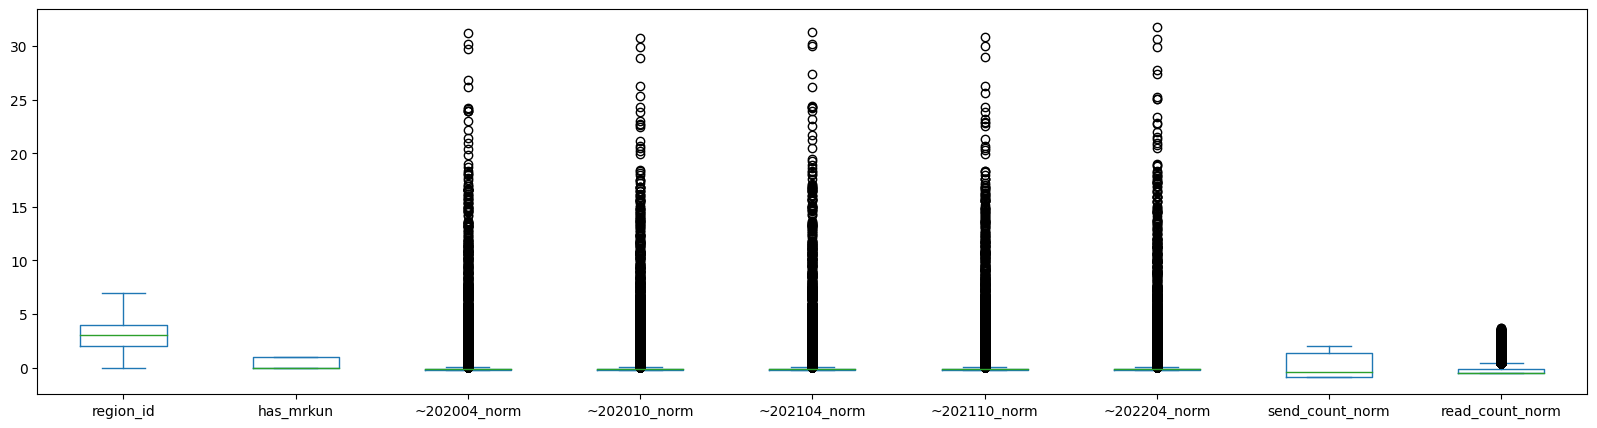

In [21]:
x=sales_norm.drop(["hospital_id","dr_count","has_visit"],axis=1)
x.plot.box(figsize=(20,5))

<AxesSubplot: ylabel='Frequency'>

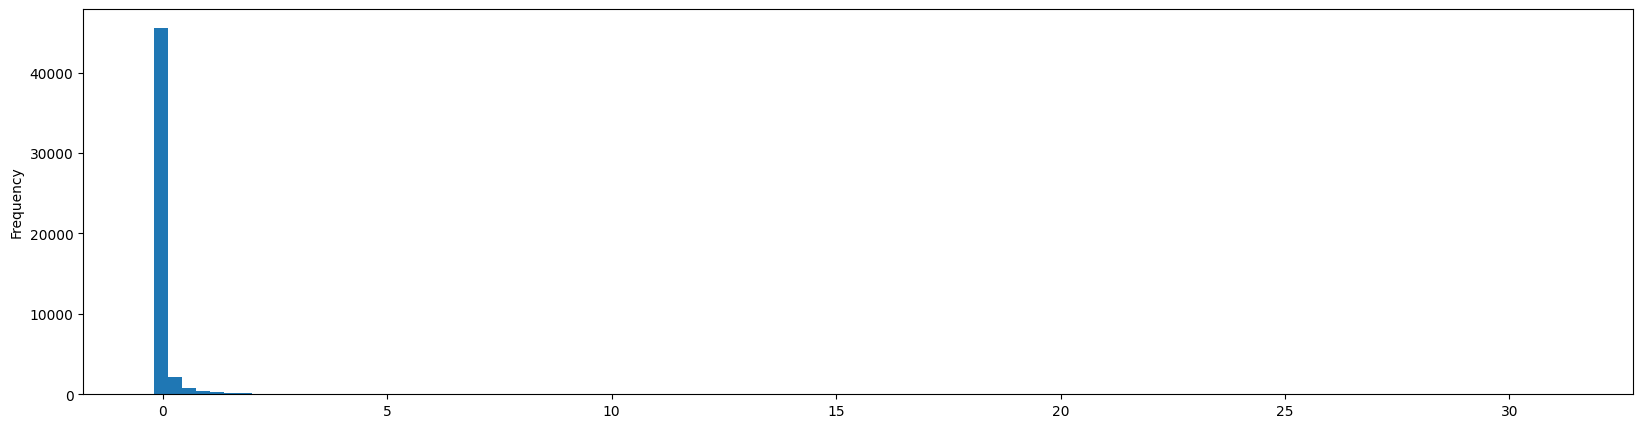

In [22]:
sales_norm["~202004_norm"].plot.hist(bins=100,figsize=(20,5))

地域毎の相関行列

In [23]:
for i in range(8):
    print(region[i])
    display(sales_mrkun[sales_mrkun["send_count"] != 0][sales_mrkun["region_id"]==i][sales_mrkun["has_visit"]==0].corr().style.background_gradient(axis=None))

北海道


/var/folders/42/922wnzy13c1bxs6j8mf7gwq00000gn/T/ipykernel_97595/1215692533.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  display(sales_mrkun[sales_mrkun["send_count"] != 0][sales_mrkun["region_id"]==i][sales_mrkun["has_visit"]==0].corr().style.background_gradient(axis=None))
/var/folders/42/922wnzy13c1bxs6j8mf7gwq00000gn/T/ipykernel_97595/1215692533.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  display(sales_mrkun[sales_mrkun["send_count"] != 0][sales_mrkun["region_id"]==i][sales_mrkun["has_visit"]==0].corr().style.background_gradient(axis=None))


,hospital_id,~202004_ave,~202010_ave,~202104_ave,~202110_ave,~202204_ave,dr_count,send_count,read_count,has_visit,region_id,has_mrkun
hospital_id,1.000000,-0.047964,-0.050155,-0.047239,-0.049769,-0.044985,-0.007134,0.000656,0.000101,nan,nan,0.040130
~202004_ave,-0.047964,1.000000,0.998189,0.999798,0.998753,0.999038,0.522154,0.526324,0.512111,nan,nan,0.139726
~202010_ave,-0.050155,0.998189,1.000000,0.996780,0.999947,0.995120,0.515346,0.519457,0.508322,nan,nan,0.144954
~202104_ave,-0.047239,0.999798,0.996780,1.000000,0.997548,0.999544,0.524217,0.528415,0.513237,nan,nan,0.137845
~202110_ave,-0.049769,0.998753,0.999947,0.997548,1.000000,0.996040,0.516563,0.520682,0.509005,nan,nan,0.144124
~202204_ave,-0.044985,0.999038,0.995120,0.999544,0.996040,1.000000,0.531980,0.536434,0.520476,nan,nan,0.141108
dr_count,-0.007134,0.522154,0.515346,0.524217,0.516563,0.531980,1.000000,0.984171,0.937436,nan,nan,0.160480
send_count,0.000656,0.526324,0.519457,0.528415,0.520682,0.536434,0.984171,1.000000,0.955578,nan,nan,0.161664
read_count,0.000101,0.512111,0.508322,0.513237,0.509005,0.520476,0.937436,0.955578,1.000000,nan,nan,0.285760
has_visit,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


東北


,hospital_id,~202004_ave,~202010_ave,~202104_ave,~202110_ave,~202204_ave,dr_count,send_count,read_count,has_visit,region_id,has_mrkun
hospital_id,1.000000,0.010064,0.008948,0.010427,0.009136,0.009750,0.023723,0.017433,0.010307,nan,nan,-0.031256
~202004_ave,0.010064,1.000000,0.998485,0.999829,0.998953,0.999303,0.219121,0.213678,0.242895,nan,nan,0.104925
~202010_ave,0.008948,0.998485,1.000000,0.997297,0.999957,0.996721,0.229674,0.223972,0.254405,nan,nan,0.106860
~202104_ave,0.010427,0.999829,0.997297,1.000000,0.997937,0.999490,0.215386,0.210038,0.238837,nan,nan,0.104205
~202110_ave,0.009136,0.998953,0.999957,0.997937,1.000000,0.997369,0.227949,0.222288,0.252520,nan,nan,0.106569
~202204_ave,0.009750,0.999303,0.996721,0.999490,0.997369,1.000000,0.221312,0.216165,0.246106,nan,nan,0.113625
dr_count,0.023723,0.219121,0.229674,0.215386,0.227949,0.221312,1.000000,0.990610,0.960653,nan,nan,0.159776
send_count,0.017433,0.213678,0.223972,0.210038,0.222288,0.216165,0.990610,1.000000,0.969150,nan,nan,0.157854
read_count,0.010307,0.242895,0.254405,0.238837,0.252520,0.246106,0.960653,0.969150,1.000000,nan,nan,0.284173
has_visit,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


関東


,hospital_id,~202004_ave,~202010_ave,~202104_ave,~202110_ave,~202204_ave,dr_count,send_count,read_count,has_visit,region_id,has_mrkun
hospital_id,1.000000,-0.000616,-0.000534,-0.000652,-0.000545,-0.000478,-0.003071,-0.002739,-0.002998,nan,nan,-0.000421
~202004_ave,-0.000616,1.000000,0.996393,0.999558,0.997484,0.998725,0.153448,0.156086,0.165529,nan,nan,0.120707
~202010_ave,-0.000534,0.996393,1.000000,0.993433,0.999902,0.991562,0.155042,0.157672,0.167310,nan,nan,0.120539
~202104_ave,-0.000652,0.999558,0.993433,1.000000,0.994937,0.999532,0.152636,0.155273,0.164630,nan,nan,0.120553
~202110_ave,-0.000545,0.997484,0.999902,0.994937,1.000000,0.993236,0.154851,0.157483,0.167093,nan,nan,0.120636
~202204_ave,-0.000478,0.998725,0.991562,0.999532,0.993236,1.000000,0.153972,0.156752,0.166510,nan,nan,0.127068
dr_count,-0.003071,0.153448,0.155042,0.152636,0.154851,0.153972,1.000000,0.995065,0.981396,nan,nan,0.127154
send_count,-0.002739,0.156086,0.157672,0.155273,0.157483,0.156752,0.995065,1.000000,0.986336,nan,nan,0.130389
read_count,-0.002998,0.165529,0.167310,0.164630,0.167093,0.166510,0.981396,0.986336,1.000000,nan,nan,0.199795
has_visit,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


中部


,hospital_id,~202004_ave,~202010_ave,~202104_ave,~202110_ave,~202204_ave,dr_count,send_count,read_count,has_visit,region_id,has_mrkun
hospital_id,1.000000,0.002285,0.001988,0.002380,0.002038,0.001841,-0.050657,-0.052177,-0.052688,nan,nan,-0.042403
~202004_ave,0.002285,1.000000,0.998289,0.999798,0.998813,0.999104,0.174142,0.175009,0.183586,nan,nan,0.122069
~202010_ave,0.001988,0.998289,1.000000,0.996914,0.999952,0.995514,0.176482,0.177442,0.186754,nan,nan,0.124173
~202104_ave,0.002380,0.999798,0.996914,1.000000,0.997633,0.999550,0.173222,0.174056,0.182374,nan,nan,0.121284
~202110_ave,0.002038,0.998813,0.999952,0.997633,1.000000,0.996350,0.176127,0.177073,0.186261,nan,nan,0.123841
~202204_ave,0.001841,0.999104,0.995514,0.999550,0.996350,1.000000,0.176566,0.177561,0.186481,nan,nan,0.128861
dr_count,-0.050657,0.174142,0.176482,0.173222,0.176127,0.176566,1.000000,0.992062,0.972649,nan,nan,0.128559
send_count,-0.052177,0.175009,0.177442,0.174056,0.177073,0.177561,0.992062,1.000000,0.980782,nan,nan,0.131286
read_count,-0.052688,0.183586,0.186754,0.182374,0.186261,0.186481,0.972649,0.980782,1.000000,nan,nan,0.225643
has_visit,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


近畿


,hospital_id,~202004_ave,~202010_ave,~202104_ave,~202110_ave,~202204_ave,dr_count,send_count,read_count,has_visit,region_id,has_mrkun
hospital_id,1.000000,0.004542,0.003174,0.004985,0.003404,0.006411,-0.018214,-0.019360,-0.019671,nan,nan,-0.011977
~202004_ave,0.004542,1.000000,0.998630,0.999841,0.999051,0.999082,0.127235,0.126945,0.123889,nan,nan,0.079241
~202010_ave,0.003174,0.998630,1.000000,0.997542,0.999961,0.995996,0.130787,0.130394,0.127162,nan,nan,0.080512
~202104_ave,0.004985,0.999841,0.997542,1.000000,0.998118,0.999512,0.126014,0.125757,0.122762,nan,nan,0.078789
~202110_ave,0.003404,0.999051,0.999961,0.998118,1.000000,0.996703,0.130217,0.129842,0.126639,nan,nan,0.080306
~202204_ave,0.006411,0.999082,0.995996,0.999512,0.996703,1.000000,0.126158,0.125856,0.123390,nan,nan,0.084698
dr_count,-0.018214,0.127235,0.130787,0.126014,0.130217,0.126158,1.000000,0.994902,0.979706,nan,nan,0.107965
send_count,-0.019360,0.126945,0.130394,0.125757,0.129842,0.125856,0.994902,1.000000,0.983751,nan,nan,0.110303
read_count,-0.019671,0.123889,0.127162,0.122762,0.126639,0.123390,0.979706,0.983751,1.000000,nan,nan,0.191646
has_visit,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


中国


,hospital_id,~202004_ave,~202010_ave,~202104_ave,~202110_ave,~202204_ave,dr_count,send_count,read_count,has_visit,region_id,has_mrkun
hospital_id,1.000000,0.003808,0.003308,0.004061,0.003363,0.002742,0.040581,0.042344,0.039647,nan,nan,0.005880
~202004_ave,0.003808,1.000000,0.998315,0.999818,0.998849,0.999114,0.144579,0.143868,0.156353,nan,nan,0.095710
~202010_ave,0.003308,0.998315,1.000000,0.997035,0.999948,0.995871,0.157654,0.157465,0.169301,nan,nan,0.098583
~202104_ave,0.004061,0.999818,0.997035,1.000000,0.997757,0.999450,0.141645,0.140816,0.153425,nan,nan,0.094759
~202110_ave,0.003363,0.998849,0.999948,0.997757,1.000000,0.996671,0.154798,0.154497,0.166483,nan,nan,0.098088
~202204_ave,0.002742,0.999114,0.995871,0.999450,0.996671,1.000000,0.142748,0.142024,0.155913,nan,nan,0.104814
dr_count,0.040581,0.144579,0.157654,0.141645,0.154798,0.142748,1.000000,0.993355,0.975756,nan,nan,0.115307
send_count,0.042344,0.143868,0.157465,0.140816,0.154497,0.142024,0.993355,1.000000,0.981117,nan,nan,0.117093
read_count,0.039647,0.156353,0.169301,0.153425,0.166483,0.155913,0.975756,0.981117,1.000000,nan,nan,0.214778
has_visit,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


四国


,hospital_id,~202004_ave,~202010_ave,~202104_ave,~202110_ave,~202204_ave,dr_count,send_count,read_count,has_visit,region_id,has_mrkun
hospital_id,1.000000,-0.020630,-0.020396,-0.020691,-0.020436,-0.020072,-0.023936,-0.022935,-0.031649,nan,nan,-0.005910
~202004_ave,-0.020630,1.000000,0.997435,0.999685,0.998210,0.998990,0.015769,0.014743,0.004652,nan,nan,-0.086433
~202010_ave,-0.020396,0.997435,1.000000,0.995326,0.999930,0.993295,0.016143,0.015255,0.004667,nan,nan,-0.089618
~202104_ave,-0.020691,0.999685,0.995326,1.000000,0.996396,0.999774,0.015616,0.014543,0.004639,nan,nan,-0.085220
~202110_ave,-0.020436,0.998210,0.999930,0.996396,1.000000,0.994585,0.016088,0.015177,0.004668,nan,nan,-0.089118
~202204_ave,-0.020072,0.998990,0.993295,0.999774,0.994585,1.000000,0.016848,0.015675,0.006104,nan,nan,-0.082411
dr_count,-0.023936,0.015769,0.016143,0.015616,0.016088,0.016848,1.000000,0.992160,0.972439,nan,nan,0.125653
send_count,-0.022935,0.014743,0.015255,0.014543,0.015177,0.015675,0.992160,1.000000,0.976497,nan,nan,0.127572
read_count,-0.031649,0.004652,0.004667,0.004639,0.004668,0.006104,0.972439,0.976497,1.000000,nan,nan,0.207373
has_visit,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


九州


,hospital_id,~202004_ave,~202010_ave,~202104_ave,~202110_ave,~202204_ave,dr_count,send_count,read_count,has_visit,region_id,has_mrkun
hospital_id,1.000000,0.030307,0.031662,0.029807,0.031450,0.029514,0.005860,0.002375,0.002256,nan,nan,0.022068
~202004_ave,0.030307,1.000000,0.997361,0.999681,0.998160,0.998792,0.221621,0.218341,0.222559,nan,nan,0.121248
~202010_ave,0.031662,0.997361,1.000000,0.995210,0.999928,0.993320,0.220873,0.217088,0.221439,nan,nan,0.123939
~202104_ave,0.029807,0.999681,0.995210,1.000000,0.996311,0.999461,0.221611,0.218513,0.222675,nan,nan,0.120159
~202110_ave,0.031450,0.998160,0.999928,0.996311,1.000000,0.994585,0.221077,0.217373,0.221705,nan,nan,0.123538
~202204_ave,0.029514,0.998792,0.993320,0.999461,0.994585,1.000000,0.223245,0.220122,0.224763,nan,nan,0.127798
dr_count,0.005860,0.221621,0.220873,0.221611,0.221077,0.223245,1.000000,0.994903,0.981679,nan,nan,0.103144
send_count,0.002375,0.218341,0.217088,0.218513,0.217373,0.220122,0.994903,1.000000,0.987031,nan,nan,0.101980
read_count,0.002256,0.222559,0.221439,0.222675,0.221705,0.224763,0.981679,0.987031,1.000000,nan,nan,0.178188
has_visit,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


read効果評価

In [24]:
sales_mrkun.info()  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50372 entries, 0 to 50371
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   hospital_id  50372 non-null  int64  
 1   ~202004_ave  50372 non-null  int64  
 2   ~202010_ave  50372 non-null  int64  
 3   ~202104_ave  50372 non-null  int64  
 4   ~202110_ave  50372 non-null  int64  
 5   ~202204_ave  50372 non-null  int64  
 6   dr_count     50372 non-null  float64
 7   send_count   50372 non-null  float64
 8   read_count   50372 non-null  float64
 9   specialty    50372 non-null  object 
 10  has_visit    50372 non-null  float64
 11  region_id    50372 non-null  int64  
 12  has_mrkun    50372 non-null  int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 6.4+ MB


In [25]:
print("read_count == 0")
print(sales_mrkun["~202004_ave"][sales_mrkun["read_count"]==0].describe())
print("read_count != 0")
print(sales_mrkun["~202004_ave"][sales_mrkun["read_count"]!=0].describe())

read_count == 0
count    3.286900e+04
mean     4.778344e+04
std      1.901470e+05
min      0.000000e+00
25%      4.220000e+03
50%      1.080400e+04
75%      2.881600e+04
max      6.519044e+06
Name: ~202004_ave, dtype: float64
read_count != 0
count    1.750300e+04
mean     1.106572e+05
std      4.626747e+05
min      0.000000e+00
25%      4.390500e+03
50%      1.403200e+04
75%      4.614700e+04
max      9.030543e+06
Name: ~202004_ave, dtype: float64


In [26]:
for i in range(8):
    print(region[i])
    print("read_count == 0")
    print(sales_mrkun["~202004_ave"][sales_mrkun["read_count"]==0][sales_mrkun["region_id"]==i].describe())
    print("read_count != 0")
    print(sales_mrkun["~202004_ave"][sales_mrkun["read_count"]!=0][sales_mrkun["region_id"]==i].describe())
    print("")

北海道
read_count == 0
count    1.124000e+03
mean     5.297677e+04
std      2.087174e+05
min      0.000000e+00
25%      4.113000e+03
50%      1.042350e+04
75%      2.824525e+04
max      3.152481e+06
Name: ~202004_ave, dtype: float64
read_count != 0
count    8.360000e+02
mean     1.275970e+05
std      4.377886e+05
min      0.000000e+00
25%      6.482000e+03
50%      1.801100e+04
75%      6.805625e+04
max      7.515971e+06
Name: ~202004_ave, dtype: float64

東北
read_count == 0
count    2.542000e+03
mean     4.869159e+04
std      2.154179e+05
min      0.000000e+00
25%      3.932500e+03
50%      9.974500e+03
75%      2.718450e+04
max      4.828929e+06
Name: ~202004_ave, dtype: float64
read_count != 0
count    1.120000e+03
mean     1.247668e+05
std      5.479308e+05
min      3.000000e+00
25%      3.482000e+03
50%      1.058350e+04
75%      3.768075e+04
max      5.701991e+06
Name: ~202004_ave, dtype: float64

関東
read_count == 0
count    1.043000e+04
mean     5.699559e+04
std      1.807042e+05
mi

北海道の既読ありなし

北海道


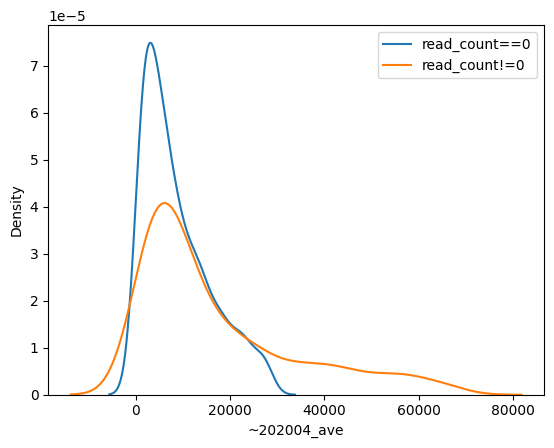

In [27]:
bins = np.linspace(0, 100000, 50)

print(region[0])
sns.kdeplot(data=sales_mrkun["~202004_ave"][sales_mrkun["read_count"]==0][sales_mrkun["region_id"]==0][sales_mrkun["~202004_ave"][sales_mrkun["read_count"]==0][sales_mrkun["region_id"]==0]<sales_mrkun["~202004_ave"][sales_mrkun["read_count"]==0][sales_mrkun["region_id"]==0].quantile(0.75)])
sns.kdeplot(data=sales_mrkun["~202004_ave"][sales_mrkun["read_count"]!=0][sales_mrkun["region_id"]==0][sales_mrkun["~202004_ave"][sales_mrkun["read_count"]!=0][sales_mrkun["region_id"]==0]<sales_mrkun["~202004_ave"][sales_mrkun["read_count"]!=0][sales_mrkun["region_id"]==0].quantile(0.75)])
plt.legend(labels=["read_count==0","read_count!=0"])
plt.show()


IPW ATT

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

import statsmodels.api as sm
from sklearn.calibration import calibration_curve
from sklearn.metrics import roc_auc_score

import itertools
import time


In [29]:
sales_mrkun.head()

,hospital_id,~202004_ave,~202010_ave,~202104_ave,~202110_ave,~202204_ave,dr_count,send_count,read_count,specialty,has_visit,region_id,has_mrkun
0,65003,17402,12980,20434,13475,22019,2.0,52.0,0.0,A,0.0,5,0
1,10192,5548,3368,7043,3612,7863,0.0,0.0,0.0,0,0.0,5,0
2,15490,3068,2174,3681,2274,4045,3.0,43.0,0.0,A,0.0,5,0
3,93607,2911,1833,3649,1953,4016,2.0,103.0,0.0,A,0.0,5,0
4,12727,2121,1379,2630,1462,2913,3.0,0.0,0.0,A,0.0,5,0


In [66]:
sales_mrkun.columns.values

array(['hospital_id', '~202004_ave', '~202010_ave', '~202104_ave',
       '~202110_ave', '~202204_ave', 'dr_count', 'send_count',
       'read_count', 'specialty', 'has_visit', 'region_id', 'has_mrkun'],
      dtype=object)

In [79]:

sales_m = sales_mrkun[sales_mrkun.columns.values][sales_mrkun["~202204_ave"]<sales_mrkun["~202204_ave"].quantile(0.75)+(sales_mrkun["~202204_ave"].quantile(0.75)-sales_mrkun["~202204_ave"].quantile(0.25))]

In [109]:
X = sales_m[["~202004_ave", "~202010_ave", "~202104_ave","~202110_ave","dr_count","has_visit","region_id"]]
Z = sales_m["has_mrkun"]

In [110]:
exog = sm.add_constant(X) # 切片の追加
logit_model = sm.Logit(endog=Z, exog=exog) # ロジスティック回帰
logit_res = logit_model.fit(maxiter=100)


Optimization terminated successfully.
         Current function value: 0.514113
         Iterations 10


In [111]:
ps = logit_res.predict(exog)
print('AUC = {:.3f}'.format(roc_auc_score(y_true=Z, y_score=ps)))
# 出力：=> AUC = 0.792


AUC = 0.752


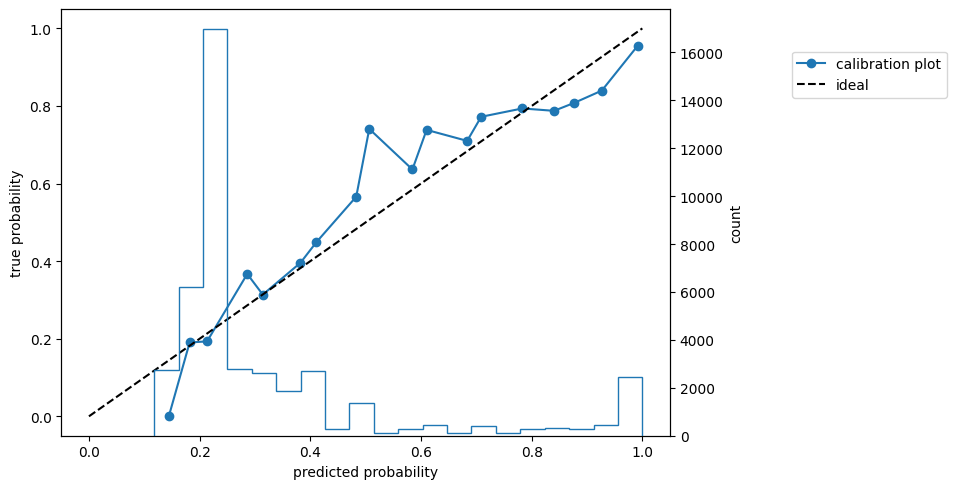

In [123]:
_, ax1 = plt.subplots(figsize=(10, 5))

prob_true, prob_pred = calibration_curve(y_true=Z, y_prob=ps, n_bins=20)
ax1.plot(prob_pred, prob_true, marker='o', label='calibration plot')
ax1.plot([0,1], [0,1], linestyle='--', color='black', label='ideal')
ax1.legend(bbox_to_anchor=(1.2, 0.9), loc='upper left', borderaxespad=0)
ax1.set_xlabel('predicted probability')
ax1.set_ylabel('true probability')

ax2 = ax1.twinx()
ax2.hist(ps, bins=20, histtype='step', rwidth=0.9)
ax2.set_ylabel('count')
plt.tight_layout()
plt.show()


In [115]:
Y = sales_m['~202204_ave'] # 結果変数（推定対象）
sample_size = len(sales_m.loc[sales_m['has_mrkun']==1])
ATT_list = []
epsilon = 1e-10
E_1 =[]
E_0 =[]
for i in range(10000):
    idx1 = pd.Series(sales_m.loc[sales_m['has_mrkun']==1, '~202204_ave'].index).sample(n=sample_size, replace=True, random_state=i)
    idx0 = pd.Series(sales_m.loc[sales_m['has_mrkun']==0, '~202204_ave'].index).sample(n=sample_size, replace=True, random_state=i)

    Z_tmp = np.r_[Z[idx1], Z[idx0]]
    Y_tmp = np.r_[Y[idx1], Y[idx0]]
    ps_tmp = np.r_[ps[idx1], ps[idx0]]
    w01_tmp = (1-Z_tmp)*ps_tmp/(1-ps_tmp+epsilon)

    E1 = np.mean(Y_tmp[Z_tmp==1])
    E0 = np.sum(Y_tmp * w01_tmp) / np.sum(w01_tmp)
    ATT = E1 - E0
    E_1.append(E1)
    E_0.append(E0)
    ATT_list.append(ATT)

print('ATT = {:.3f} ± {:.3f} (s.d.={:.3f})'.format(np.mean(ATT_list), np.std(ATT_list)*1.96, np.std(ATT_list)))
# 出力：=> ATT = 0.026 ± 0.013 (s.d.=0.006)


/var/folders/42/922wnzy13c1bxs6j8mf7gwq00000gn/T/ipykernel_97595/1759289741.py:14: RuntimeWarning: invalid value encountered in divide
  w01_tmp = (1-Z_tmp)*ps_tmp/(1-ps_tmp)
/var/folders/42/922wnzy13c1bxs6j8mf7gwq00000gn/T/ipykernel_97595/1759289741.py:14: RuntimeWarning: divide by zero encountered in divide
  w01_tmp = (1-Z_tmp)*ps_tmp/(1-ps_tmp)
/var/folders/42/922wnzy13c1bxs6j8mf7gwq00000gn/T/ipykernel_97595/1759289741.py:14: RuntimeWarning: invalid value encountered in divide
  w01_tmp = (1-Z_tmp)*ps_tmp/(1-ps_tmp)
/var/folders/42/922wnzy13c1bxs6j8mf7gwq00000gn/T/ipykernel_97595/1759289741.py:14: RuntimeWarning: invalid value encountered in divide
  w01_tmp = (1-Z_tmp)*ps_tmp/(1-ps_tmp)
/var/folders/42/922wnzy13c1bxs6j8mf7gwq00000gn/T/ipykernel_97595/1759289741.py:14: RuntimeWarning: invalid value encountered in divide
  w01_tmp = (1-Z_tmp)*ps_tmp/(1-ps_tmp)
/var/folders/42/922wnzy13c1bxs6j8mf7gwq00000gn/T/ipykernel_97595/1759289741.py:14: RuntimeWarning: invalid value encountered

ATT = nan ± nan (s.d.=nan)


/var/folders/42/922wnzy13c1bxs6j8mf7gwq00000gn/T/ipykernel_97595/1759289741.py:14: RuntimeWarning: divide by zero encountered in divide
  w01_tmp = (1-Z_tmp)*ps_tmp/(1-ps_tmp)
/var/folders/42/922wnzy13c1bxs6j8mf7gwq00000gn/T/ipykernel_97595/1759289741.py:14: RuntimeWarning: invalid value encountered in divide
  w01_tmp = (1-Z_tmp)*ps_tmp/(1-ps_tmp)
/var/folders/42/922wnzy13c1bxs6j8mf7gwq00000gn/T/ipykernel_97595/1759289741.py:14: RuntimeWarning: divide by zero encountered in divide
  w01_tmp = (1-Z_tmp)*ps_tmp/(1-ps_tmp)
/var/folders/42/922wnzy13c1bxs6j8mf7gwq00000gn/T/ipykernel_97595/1759289741.py:14: RuntimeWarning: invalid value encountered in divide
  w01_tmp = (1-Z_tmp)*ps_tmp/(1-ps_tmp)
/var/folders/42/922wnzy13c1bxs6j8mf7gwq00000gn/T/ipykernel_97595/1759289741.py:14: RuntimeWarning: invalid value encountered in divide
  w01_tmp = (1-Z_tmp)*ps_tmp/(1-ps_tmp)
/var/folders/42/922wnzy13c1bxs6j8mf7gwq00000gn/T/ipykernel_97595/1759289741.py:14: RuntimeWarning: invalid value encountere